In [76]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import nltk 
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob,Word
from nltk.stem.snowball import SnowballStemmer
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
df=pd.read_csv('restaurant.csv')

In [40]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [42]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [43]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [44]:
df['date']=pd. to_datetime(df['date'])
df['starts'] =pd.to_numeric(df['stars'], errors='coerce')

<Axes: xlabel='stars', ylabel='count'>

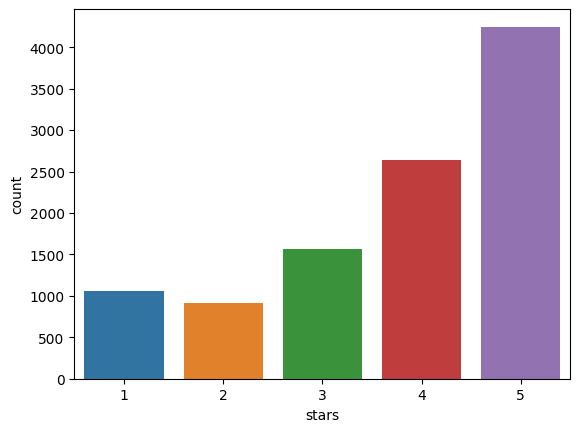

In [45]:
sns.countplot(x=df['stars']) #Yorumların Dağılımı

In [46]:
# Tarih sütununu aylara göre gruplayarak puanın ortalamasını alın
df['Month'] = df['date'].dt.to_period('M')  # Her bir tarihi ay bazında grupla
avg_rating_per_month = df.groupby('Month')['stars'].mean().reset_index()

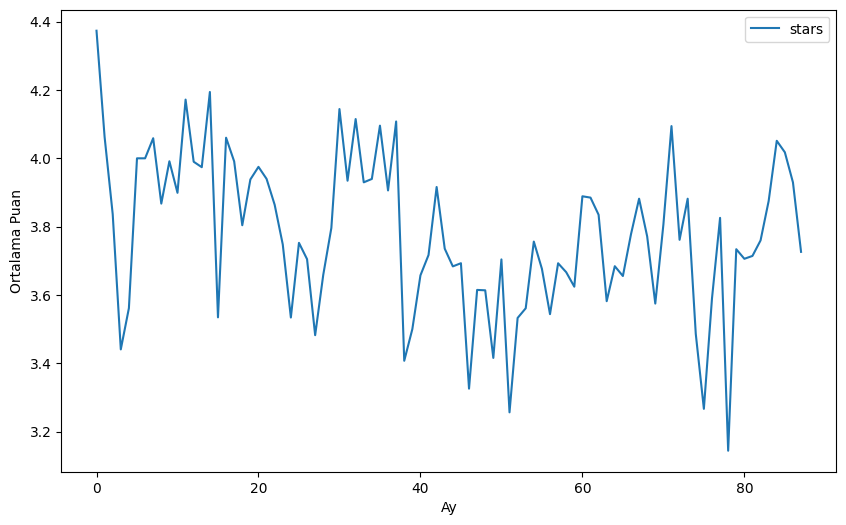

In [55]:
# Aylara göre ortalama puan değişimi
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_per_month)

# Eksen isimlerini ekleyin
plt.xlabel('Ay')
plt.ylabel('Ortalama Puan')

plt.show()

In [56]:
#Textleri Düzeltme
df['text']=df['text'].str.lower() #kucuk harfe cevir'

df['text']=df['text'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir 

df['text']=df['text'].str.replace('\d+','') # rakamlari yoket

df['text']=df['text'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [57]:
x = df['text']
y = df['stars']

In [60]:
vect = CountVectorizer(ngram_range=(1,2),stop_words='english')

In [61]:
x = vect.fit_transform(x)

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=.20,random_state=42)

In [63]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [64]:
def getModel(model):
    fit=model.fit(x_train,y_train)
    predict = model.predict(x_test)
    print("--------Accuary Score--------")
    print(accuracy_score(predict,y_test))
    print("--------Classification Report--------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f')

--------Accuary Score--------
0.5268714011516314
--------Classification Report--------
              precision    recall  f1-score   support

           1       0.32      0.88      0.47        77
           2       0.03      0.45      0.05        11
           3       0.14      0.36      0.20       120
           4       0.40      0.35      0.37       623
           5       0.91      0.61      0.73      1253

    accuracy                           0.53      2084
   macro avg       0.36      0.53      0.36      2084
weighted avg       0.69      0.53      0.58      2084



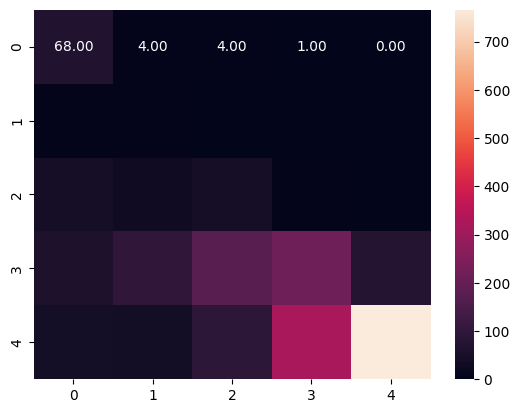

In [65]:
getModel(MultinomialNB())

--------Accuary Score--------
0.5810940499040307
--------Classification Report--------
              precision    recall  f1-score   support

           1       0.53      0.56      0.55       204
           2       0.26      0.35      0.30       132
           3       0.40      0.47      0.43       267
           4       0.43      0.49      0.46       473
           5       0.82      0.69      0.75      1008

    accuracy                           0.58      2084
   macro avg       0.49      0.51      0.50      2084
weighted avg       0.62      0.58      0.59      2084



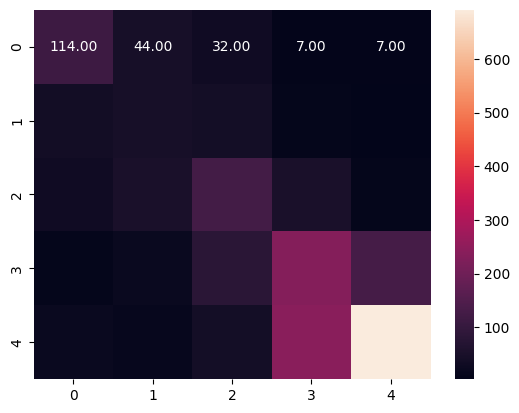

In [66]:
getModel(LogisticRegression())

--------Accuary Score--------
0.42034548944337813
--------Classification Report--------
              precision    recall  f1-score   support

           1       0.23      0.32      0.27       152
           2       0.09      0.15      0.11        97
           3       0.08      0.40      0.14        65
           4       0.24      0.34      0.28       385
           5       0.78      0.47      0.59      1385

    accuracy                           0.42      2084
   macro avg       0.28      0.34      0.28      2084
weighted avg       0.59      0.42      0.47      2084



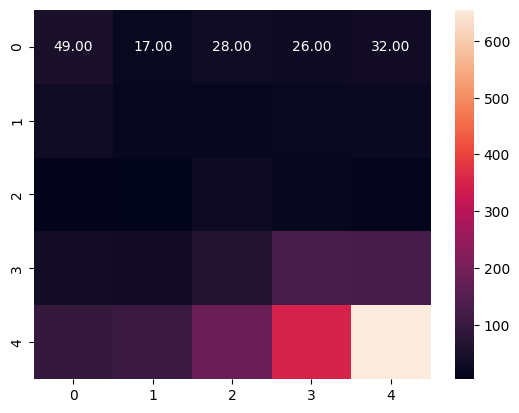

In [69]:
getModel(KNeighborsClassifier())

--------Accuary Score--------
0.42658349328214973
--------Classification Report--------
              precision    recall  f1-score   support

           1       0.34      0.35      0.34       208
           2       0.17      0.18      0.17       159
           3       0.28      0.28      0.28       315
           4       0.29      0.33      0.31       481
           5       0.65      0.59      0.62       921

    accuracy                           0.43      2084
   macro avg       0.34      0.34      0.34      2084
weighted avg       0.44      0.43      0.43      2084



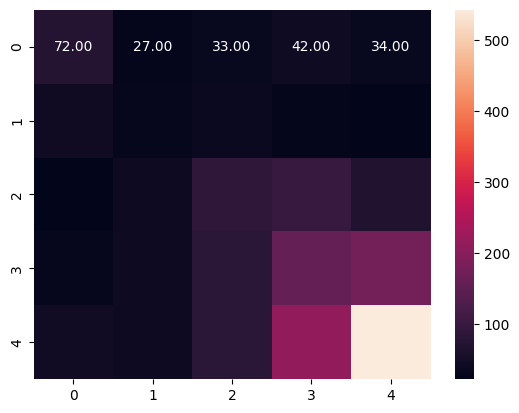

In [74]:
getModel(DecisionTreeClassifier())

--------Accuary Score--------
0.46833013435700577
--------Classification Report--------
              precision    recall  f1-score   support

           1       0.19      0.71      0.30        56
           2       0.02      0.50      0.03         6
           3       0.06      0.39      0.10        49
           4       0.19      0.41      0.26       241
           5       0.97      0.47      0.63      1732

    accuracy                           0.47      2084
   macro avg       0.28      0.50      0.26      2084
weighted avg       0.83      0.47      0.57      2084



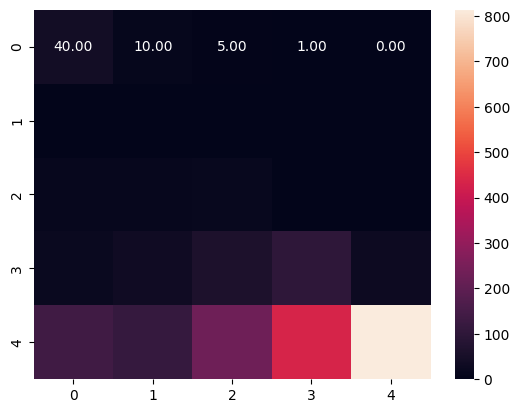

In [77]:
getModel(RandomForestClassifier())

In [85]:
iyi =  df[df['stars']==5]['text']

In [89]:
kotu =  df[df['stars']==1]['text']

In [98]:
 def wc(data):
    mask = np.array(Image.open("cloud.png"))
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color='white' , mask=mask, contour_color='steelblue')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

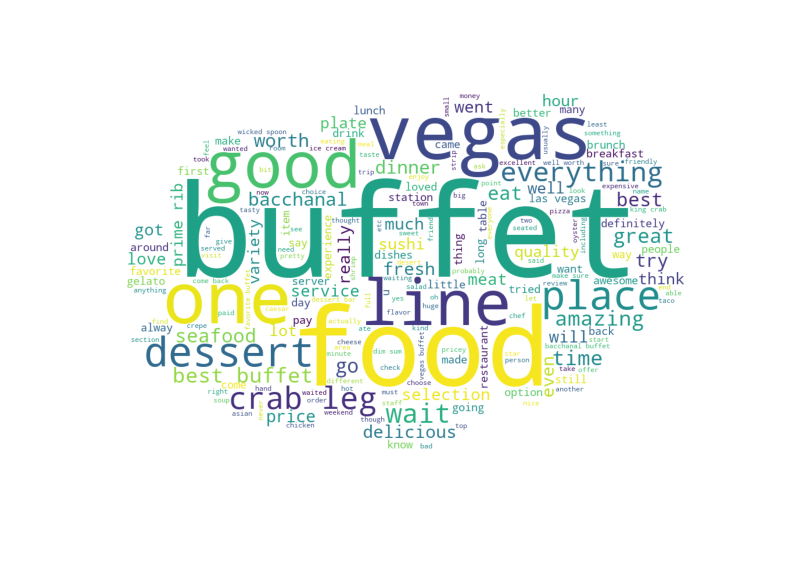

In [100]:
wc(iyi)

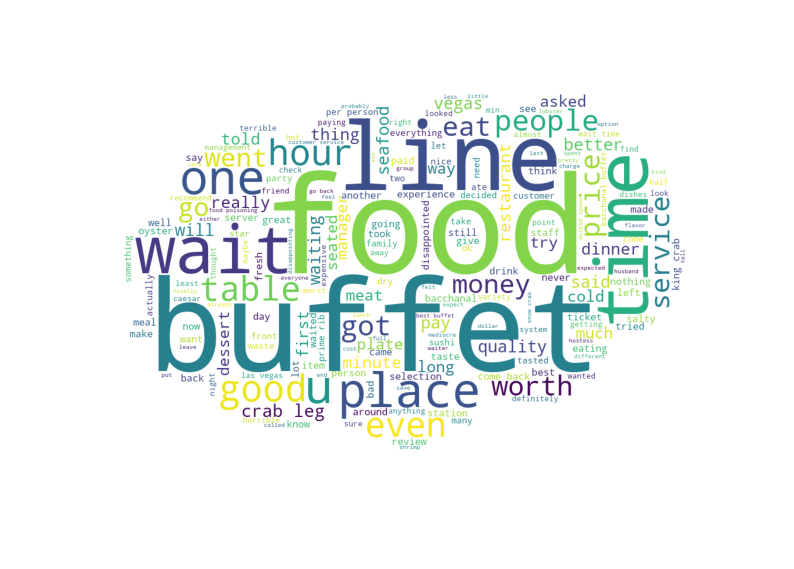

In [101]:
wc(kotu)